# Intro to Machine Learning: Regression and Classification

- Review machine learning workflow with examples from regression and classification.
- Introduce Neural Nets and the `keras` library.
- Expand our notions of data to examine images and text.

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
games = pd.read_csv('data/video-game-sales-with-ratings.zip', compression = 'zip')

In [3]:
games.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

### First: no missing data or categorical data

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [18]:
#drop all missing critic scores


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 16 columns):
Name               8137 non-null object
Platform           8137 non-null object
Year_of_Release    7983 non-null float64
Genre              8137 non-null object
Publisher          8133 non-null object
NA_Sales           8137 non-null float64
EU_Sales           8137 non-null float64
JP_Sales           8137 non-null float64
Other_Sales        8137 non-null float64
Global_Sales       8137 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         8099 non-null object
User_Count         7017 non-null float64
Developer          8131 non-null object
Rating             8054 non-null object
dtypes: float64(9), object(7)
memory usage: 1.1+ MB


In [19]:
#get rid of user_count


In [20]:
#drop any other missing data


In [21]:
games.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [26]:
games.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Dealing with Categories

In [28]:
pd.get_dummies(games, columns = ['Platform']).head()

Name  Year_of_Release         Genre Publisher  \
0                Wii Sports           2006.0        Sports  Nintendo   
1         Super Mario Bros.           1985.0      Platform  Nintendo   
2            Mario Kart Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  ...  \
0     41.36     28.96      3.77         8.45         82.53          76.0  ...   
1     29.08      3.58      6.81         0.77         40.24           NaN  ...   
2     15.68     12.76      3.79         3.29         35.52          82.0  ...   
3     15.61     10.93      3.28         2.95         32.77          80.0  ...   
4     11.27      8.89     10.22         1.00         31.37           NaN  ...   

   Platform_SAT Platform_SCD  Platform_SNES Platform_TG16 Platform_WS  \
0             0            0              0             0           0   
1             0            0              0             0           0   
2             0            0              0             0           0   
3             0            0              0             0           0   
4             0            0              0             0           0   

   Platform_Wii  Platform_WiiU  Platform_X360  Platform_XB  Platform_XOne  
0             1              0              0            0              0  
1             0              0              0            0              0  
2             1              0              0            0              0  
3             1              0              0            0              0  
4             0              0              0            0              0  

[5 rows x 46 columns]

In [30]:
#select numeric columns
col_list = []

In [31]:
X = games[col_list]
y = games['Rating']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
lr = LinearRegression()

In [36]:
#build the model
#lr.fit(X_train, y_train)
#use model to make predictions
predictions = lr.predict(X_test, y_test)

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
#evaluate your model
print(np.sqrt(mean_squared_error(y_test, predictions)))

NameError: name 'predictions' is not defined

### Classification Review

In [39]:
from sklearn.datasets import load_digits

In [40]:
digits = load_digits()

In [41]:
X = digits.data
y = digits.target

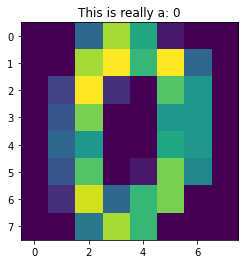

In [46]:
plt.imshow(X[0].reshape(8, 8))
plt.title('This is really a: {}'.format(y[0]));

In [47]:
#create train/test split


In [48]:
#instantiate a knn model


In [49]:
#fit


In [50]:
#predict


In [51]:
#score on test using knn.score(X_test, y_test)


In [52]:
#write a loop and assess the score for a KNN 
#with n_neighbors from 1 to 41 and plot scores
#of each fit
